In [32]:
import pandas as pd


In [33]:
import os

In [34]:
pwd

'C:\\Users\\HP'

In [46]:
customers = pd.read_csv(r"C:\\Users\\HP\\Downloads\\Customers.csv")

In [53]:
products = pd.read_csv(r"C:\\Users\\HP\\Downloads\\Products.csv")

In [57]:
transactions = pd.read_csv(r"C:\Users\HP\Downloads\Transactions.csv")

In [58]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [59]:
transactions.describe()


,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


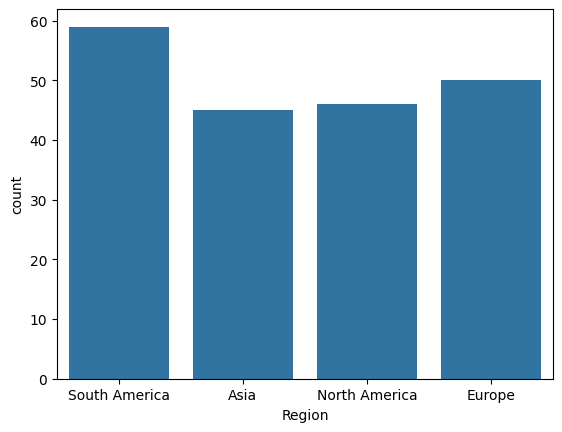

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Region', data=customers)
plt.show()


In [61]:
data = pd.merge(transactions, products, on='ProductID')
data = pd.merge(data, customers, on='CustomerID')


In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
customers = pd.read_csv(r"C:\\Users\\HP\\Downloads\\Customers.csv")
transactions = pd.read_csv(r"C:\Users\HP\Downloads\Transactions.csv")


In [66]:
print(customers.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [67]:
print(customers.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [69]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [70]:
transaction_summary = transactions.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': ['sum', 'mean'],
    'TransactionDate': 'max'
}).reset_index()


transaction_summary.columns = ['CustomerID', 'TransactionCount', 'TotalSpent', 'AvgSpent', 'LastTransactionDate']

today = pd.Timestamp.now()
transaction_summary['Recency'] = (today - transaction_summary['LastTransactionDate']).dt.days


In [71]:
customer_data = pd.merge(customers, transaction_summary, on='CustomerID', how='inner')


In [72]:
clustering_data = customer_data[['TransactionCount', 'TotalSpent', 'AvgSpent', 'Recency']]


In [73]:
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)


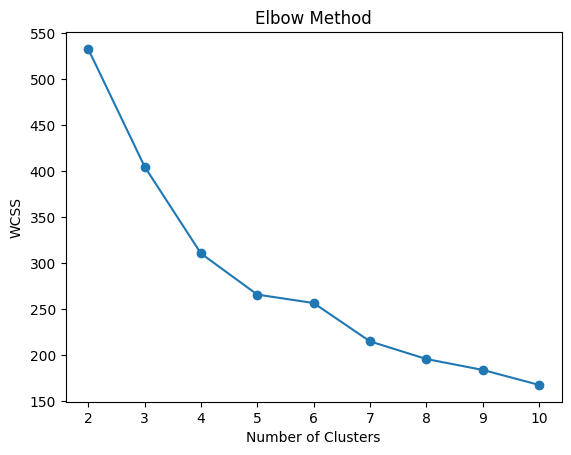

In [74]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [81]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)


In [76]:
db_index = davies_bouldin_score(clustering_data_scaled, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.097320993349616


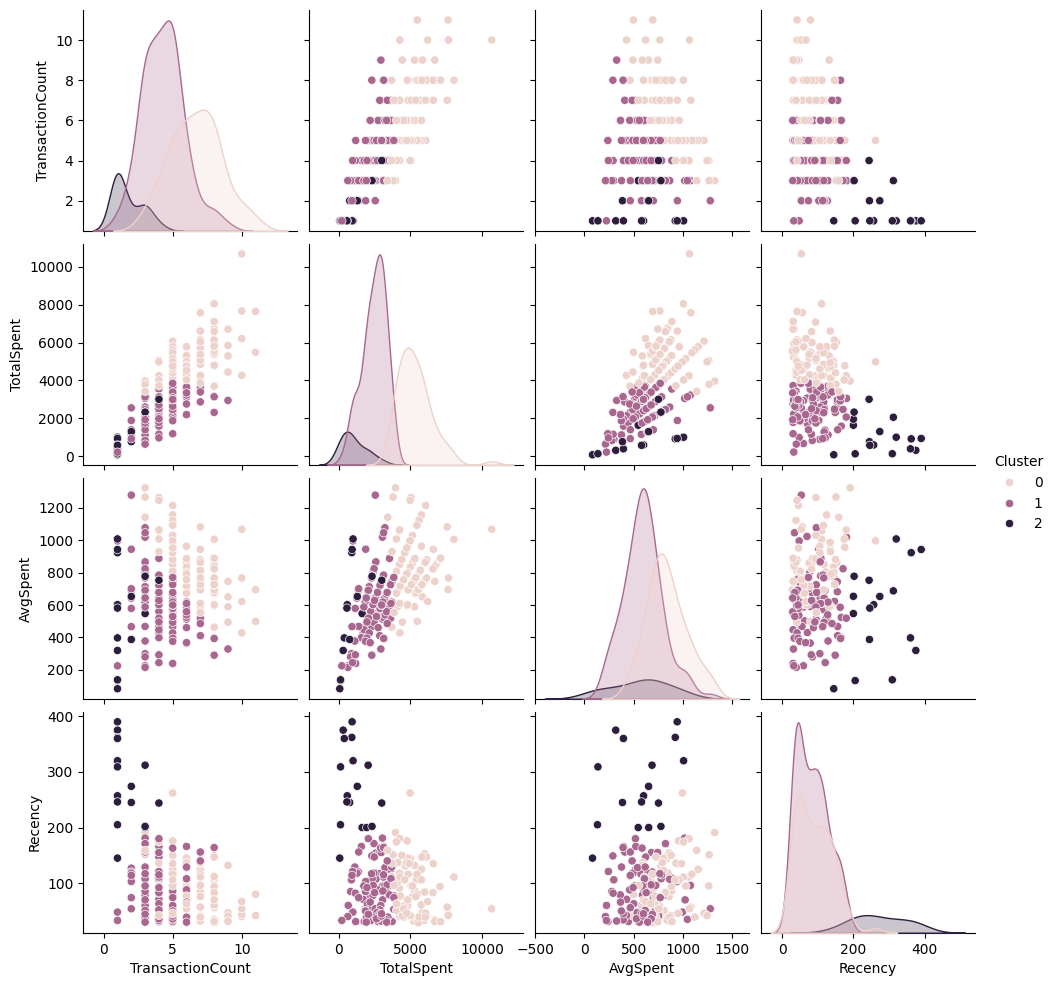

In [79]:
sns.pairplot(customer_data, hue='Cluster', vars=['TransactionCount', 'TotalSpent', 'AvgSpent', 'Recency'])
plt.show()

In [82]:
customer_data[['CustomerID', 'Cluster']].to_csv("YourName_Clustering.csv", index=False)